# 抽樣 Sampling
沒有人能掌管所有，如果有的話，我們就不需要統計學了。

假設我們要知道全國人口的收入狀況，不可能一個一個登門拜訪去問吧。如果
$$
\begin{split}
& \text{Population Standard Deviation } \sigma = \sqrt{\frac{\sum{(x_i-\mu)^2}}{N}} \\
& \text{Sample Standard Deviation } S = \sqrt{\frac{\sum{(x_i-\bar{x})^2}}{n-1}}
\end{split}
$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from _utils import population_gens

In [2]:
population_size = int(1e06) # 母群體總數

# init
population_gens = population_gens(population_size = population_size)

### Retangular Distribution Population

Data mean: 5.00e-01
Data std: 2.89e-01


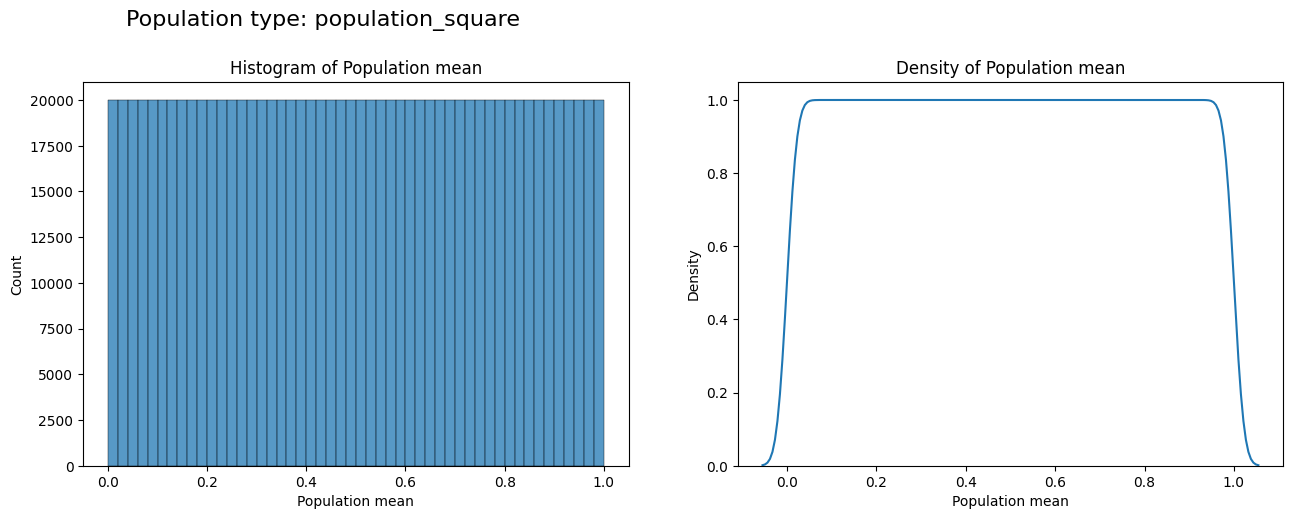

In [3]:
# 長方形分佈
population_square = population_gens.gen_population_square()
population_gens.plot()

### Triangular Distribution Population
Triangle Height $H = \lfloor \sqrt{\ population\_size\ } \rfloor$

Total element number $N = H^2$

Data mean: 5.00e-01
Data std: 2.04e-01


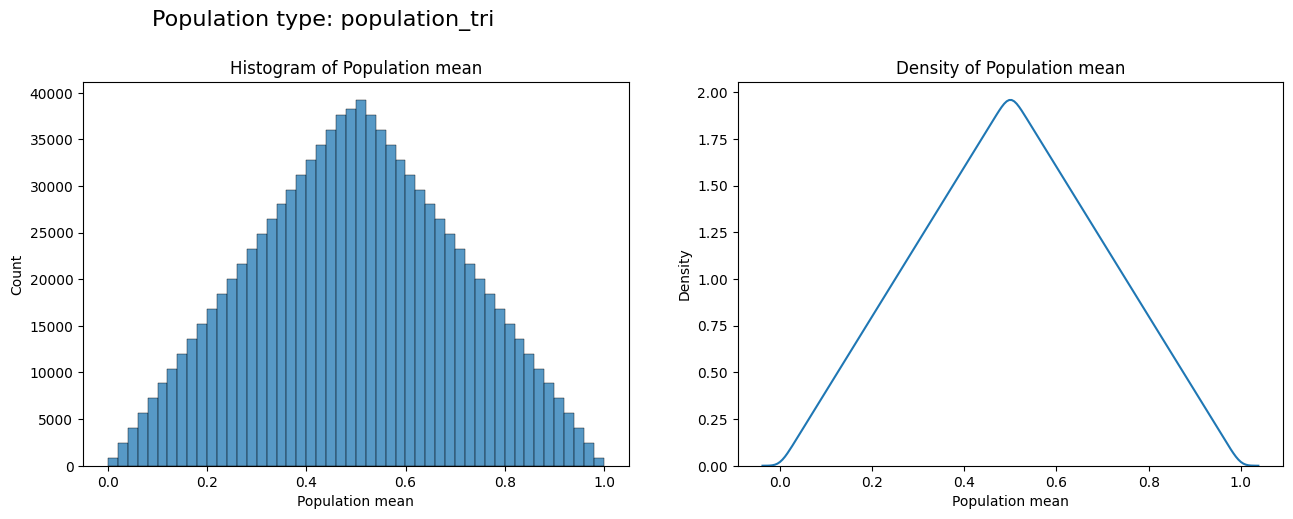

In [4]:
# triangular distribution

population_tri = population_gens.gen_population_triangle()
population_gens.plot()

### Normal Distribution Population

Data mean: 1.62e-03
Data std: 1.00e+00


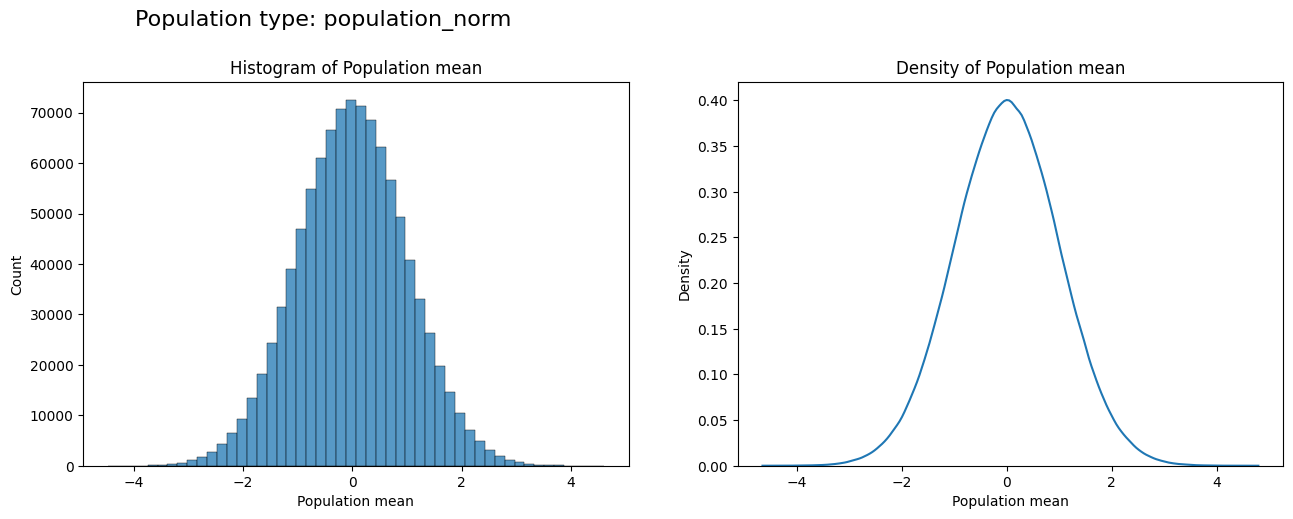

In [5]:
# 常態分佈
population_norm = population_gens.gen_population_normal()
population_gens.plot()

### Randomly Distribution Population

Data mean: 5.00e-01
Data std: 2.88e-01


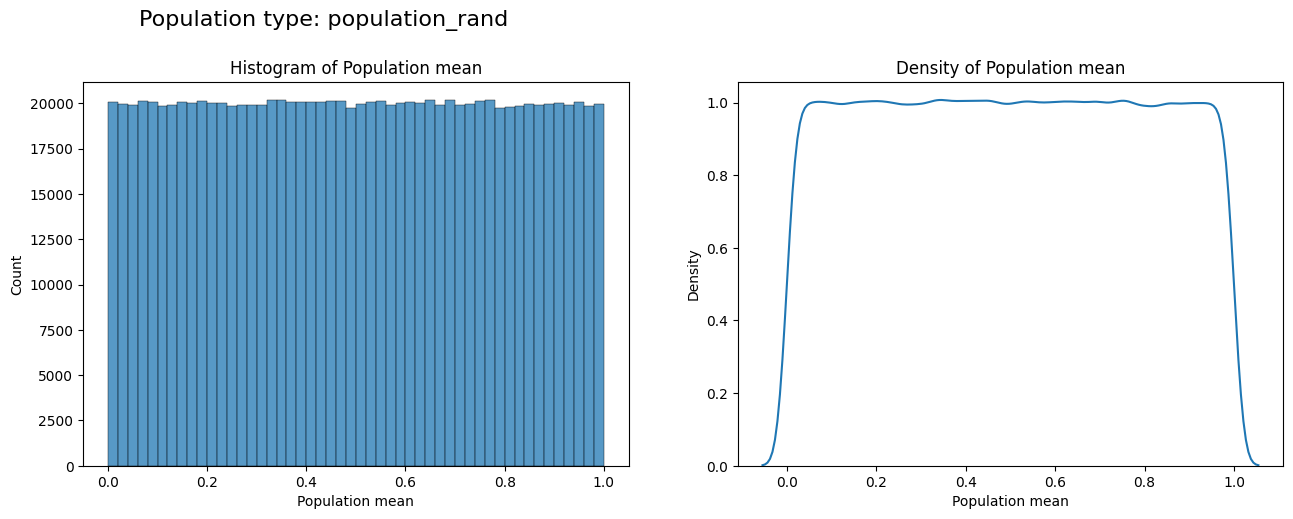

In [6]:
# 隨機非常態分佈
population_rand = population_gens.gen_population_rand()
population_gens.plot()

### 自定義母群體分佈吧！
請記得母群體大小要和當初設定的 `population_size` 一樣

Data mean: 2.50e-01
Data std: 1.94e-01


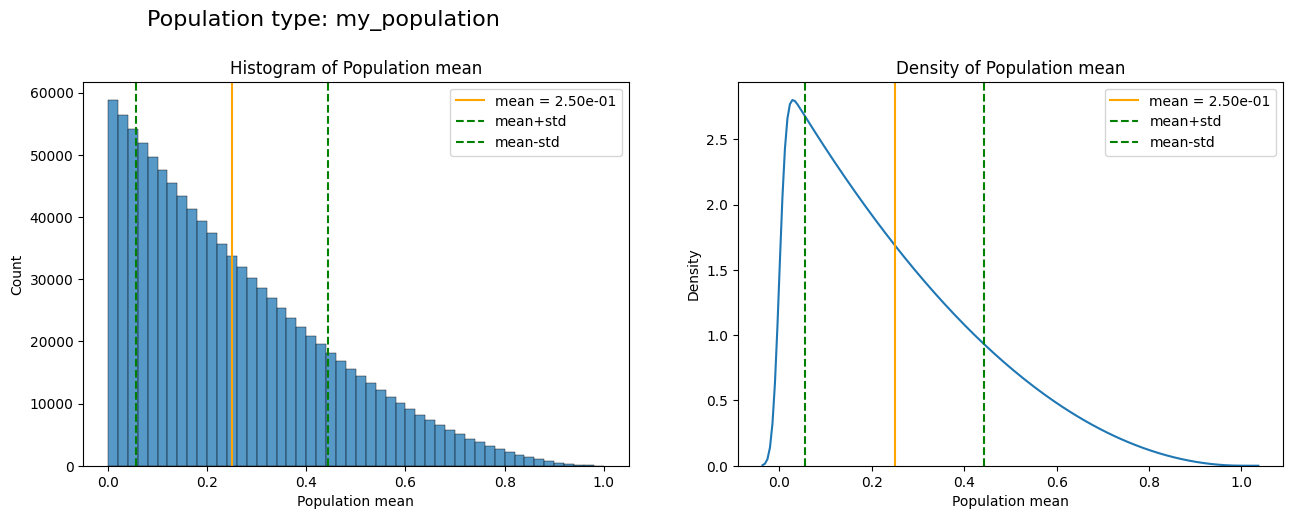

In [7]:
########## Start of your code ##########

# 範例：拋物線分佈
data = np.ones(population_size)
for i in range(len(data)):
    tmp = (i/len(data))
    data[i] = np.power(data[i]*tmp, 1/3)
data = np.max(data)-data
name = "my_population" # 名稱不要打中文

##########  End of your code  ##########

# normalize
data /= np.max(data)
my_population = population_gens.gen_my_population(data = data, name = name) # package using population_gens api
population_gens.plot(plot_mu_sig = True) # plot

### 實驗
請試著調整樣本數 `sample_size`、抽樣次數 `number_of_samples` 和改變母體的分佈情型 `populations`，並且觀察平均值、標準差和圖形的變化。

In [8]:
import random

def sampling(population, sample_size, number_of_samples):
    sample_means = np.zeros(number_of_samples)
    for i in range(0,number_of_samples): # 做 `number_of_samples` 次的抽樣
        c = random.sample(range(population_size),sample_size) # 從母群體中隨機抽出 `sample_size` 個樣本
        sample_means[i] = population[c].mean()
    return sample_means

Data mean: 2.50e-01
Data std: 6.05e-03


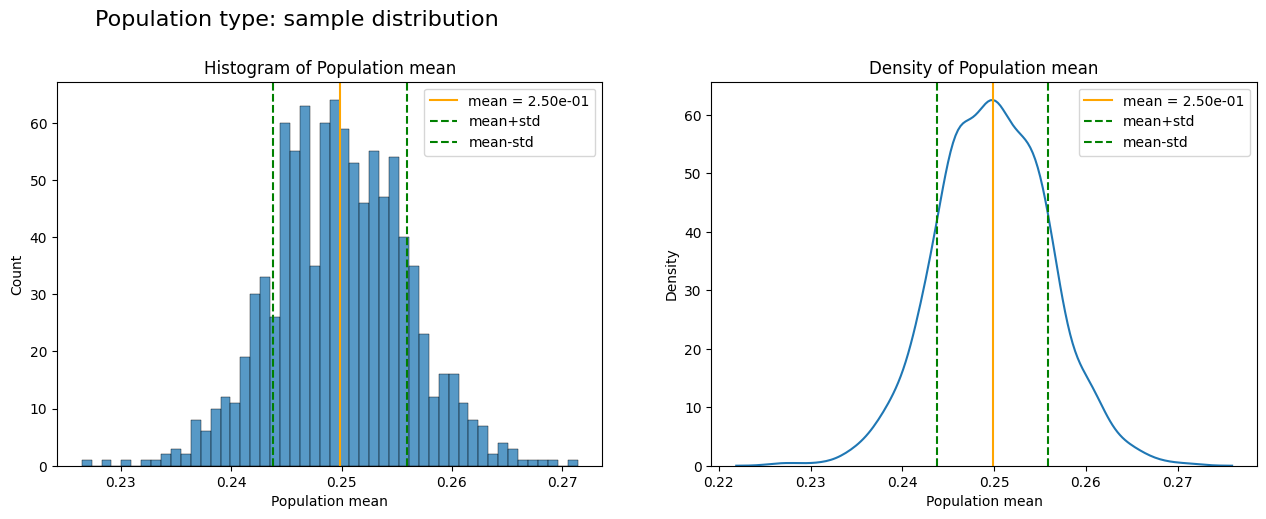

In [9]:
# 樣本數 (建議 1~1000)
sample_size = 1000

# 抽樣次數 (建議不要超過 1000)
number_of_samples = 1000

# 母體分佈狀況，可以選擇 population_square, population_tri, population_norm, population_rand
populations = my_population

data = sampling(populations["data"], sample_size, number_of_samples) # 抽樣

# 畫出來
population_gens.plot(data, 'sample distribution', plot_mu_sig = True)

# 實驗結果：
# 母體平均值與樣本平均值相近
# 樣本數愈高，樣本標準差愈小

# 中央極限定理
無論母群體分佈如何，只要樣本數夠大，最後都會形成常態分佈。

### Multi Graph Plotting

In [10]:
# note that `population_size` = 100000
number_of_samples = 1000     # 抽樣次數
sample_size = [1, 5, 100]   # 樣本數目

# 可以複選 population_square, population_tri, population_norm, population_rand
populations = [population_square, population_tri, population_norm]

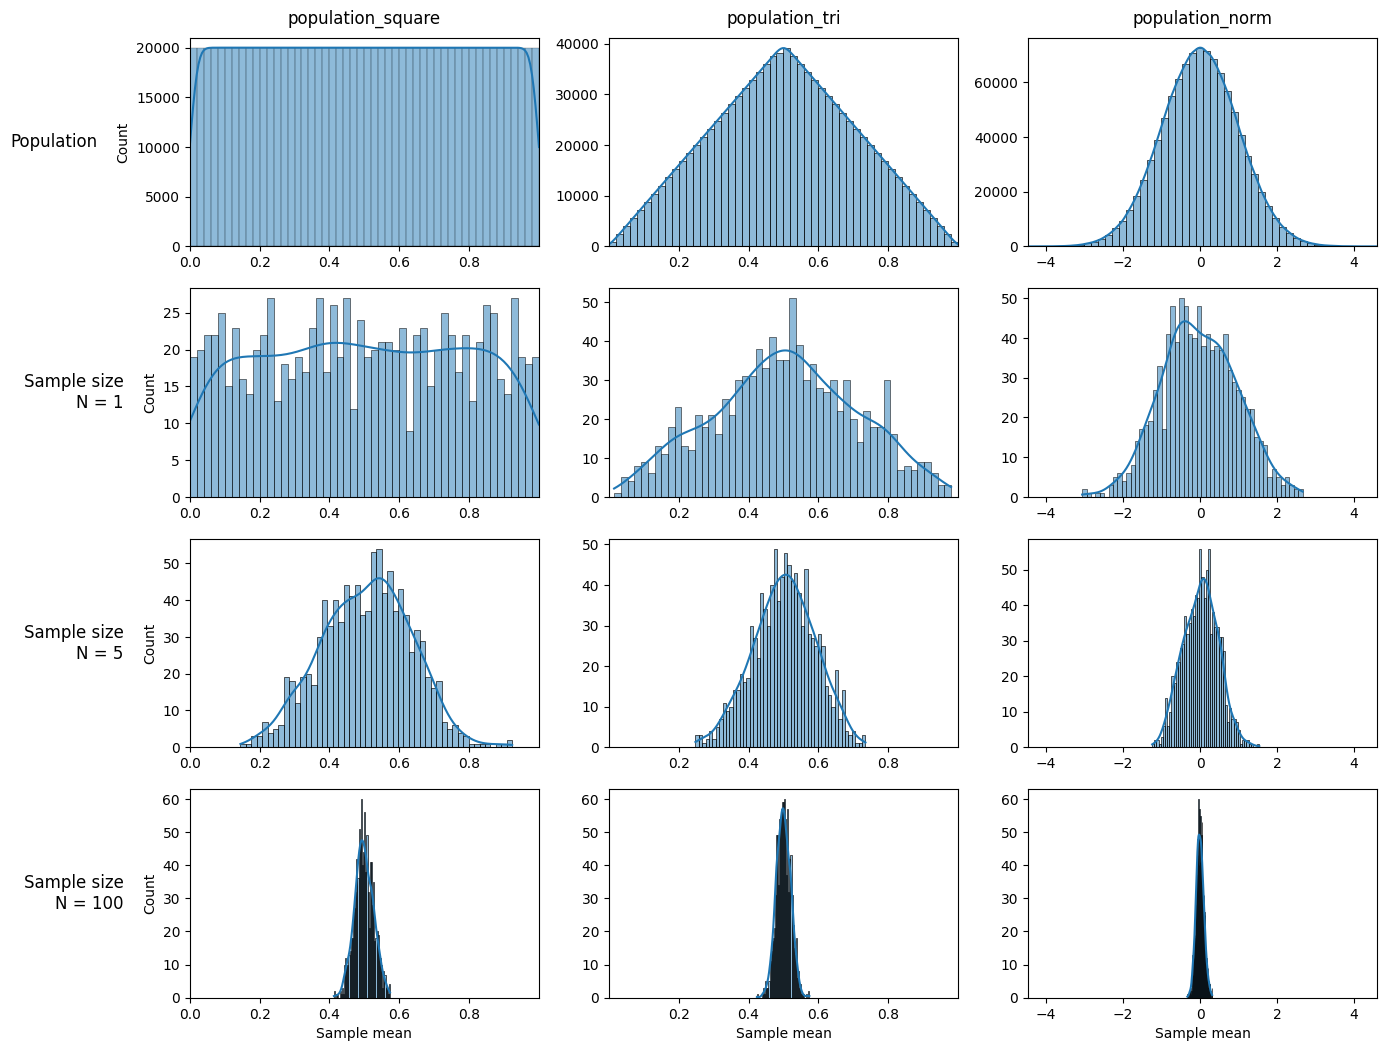

In [11]:
# plot the histogram of sample means
cache = population_gens.plot_hist_multi(sample_size, number_of_samples, populations, sampling)

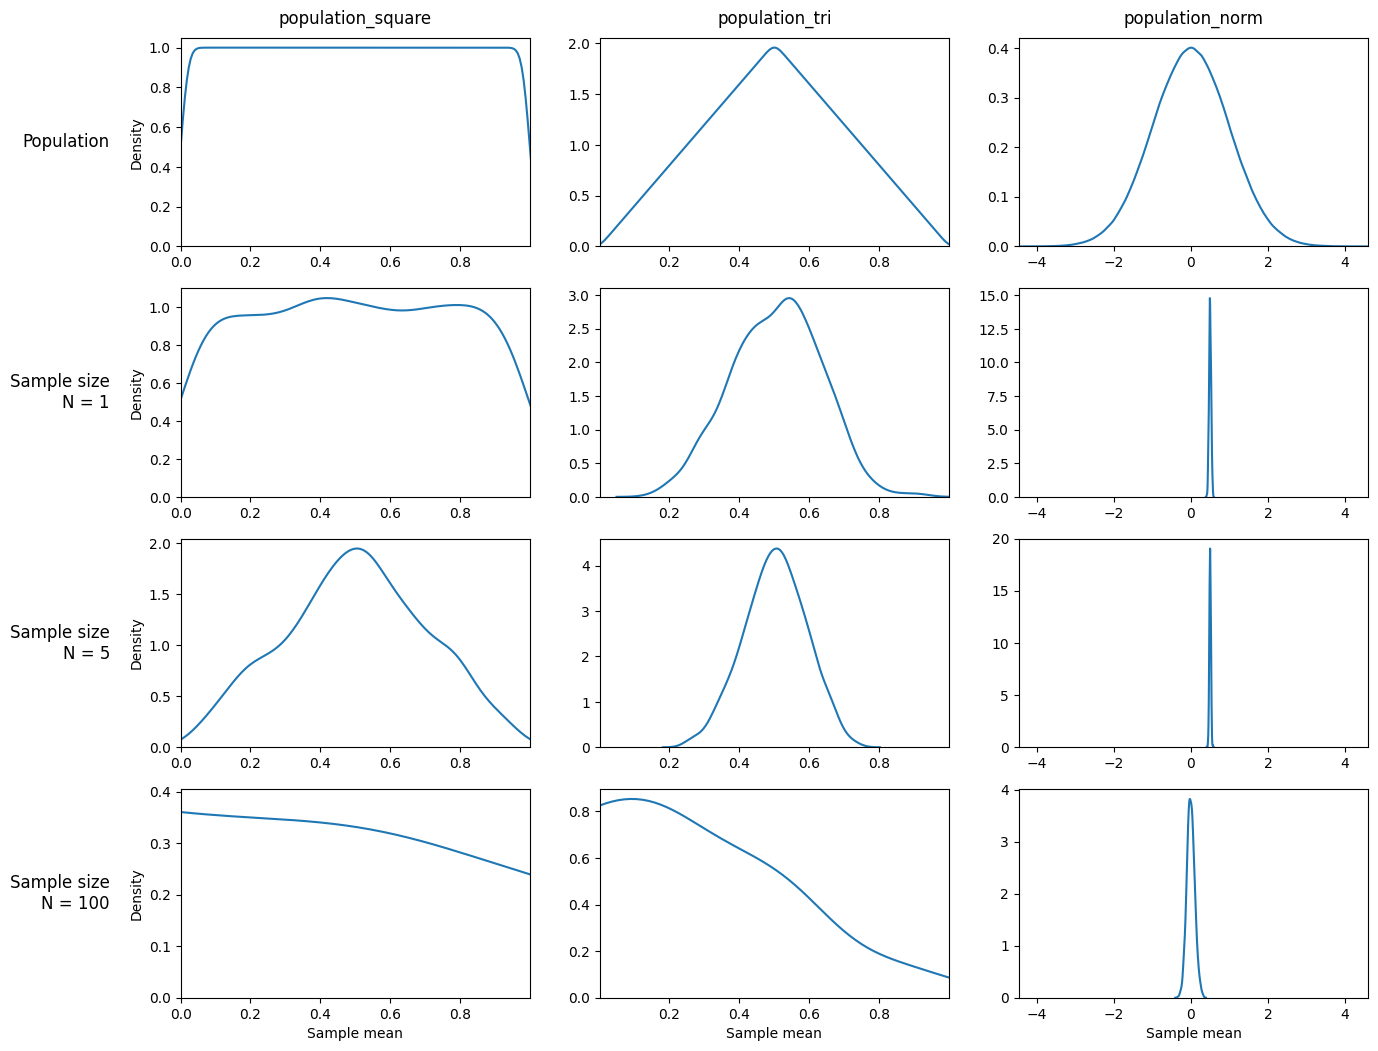

In [12]:
# plot the density of sample means
population_gens.plot_kde_multi(sample_size, number_of_samples, populations, sampling, cache = cache);